# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [57]:
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1.

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


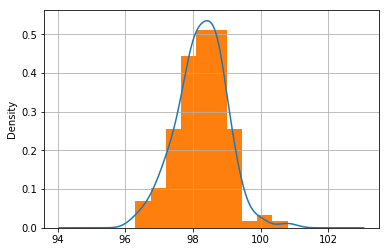

In [139]:
#1. 

df.temperature.plot.kde()
df.temperature.hist(density=True)
# Shapiro-Wilk Test

# seed the random number generator
seed(1)
# generate univariate observations
data = df.temperature
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

# 2.

In [30]:
#2. 
df.shape[0]
#data is large enough
#temperatures are independent as they come from different people

130

# 3.

In [100]:
#3

data_mean = np.mean(df.temperature)

In [52]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

translate_temperature = df.temperature - data_mean + 98.6
bs_replicates = draw_bs_reps(translate_temperature, np.mean,1000)
p=np.sum(bs_replicates <=np.mean(df.temperature))/len(bs_replicates)
print(format(p, '.4f'))
# reject Null Hypothesis as p < 0.5. true population isn't 98.6

0.0000


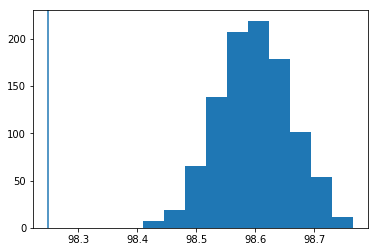

In [53]:
_ = plt.hist(bs_replicates)
_ = plt.axvline(data_mean)

In [79]:
#i should use one sample test as we are testing a single sample against the population
#either z test or ttest  can work in this situation because the sample size is large. 

#t test
t_statistic = (data_mean - 98.6)/(np.std(df.temperature)/np.sqrt(len(df.temperature)))
df_ttest=df.shape[0]-1
p = stats.t.cdf(t_statistic,df=df_ttest)*2
print(p)
#p value doubled to look at two tail test


2.1887464624095175e-07


In [80]:
#z test
p = stats.norm.cdf(t_statistic)*2
print(p)
#in this case z-score is the same calculation as t statistic due to the lack of population variance and large data of the sample

4.3523151658821886e-08


In [ ]:
#in both cases, reject null due to the low p-value

# 4.

In [83]:
sample = np.random.choice(df.temperature, size = 10)
t_statistic_sample = (np.mean(sample)-98.6)/(np.std(sample)/np.sqrt(len(sample)))
p = stats.t.cdf(t_statistic_sample,df=(len(sample)-1))*2
print (p)

0.019819701462187946


In [142]:
z_score_sample = (np.mean(sample)-98.6)/(np.std(sample)/np.sqrt(len(sample)))
p = stats.norm.cdf(z_score_sample)*2
print(p)

0.004698850639616519


In [86]:
#t statistic is correct one to use. Its p value increased significantly more than the z test. the two tests devidated in results versus larger data set

# 5.

In [140]:
#margin of error & confidence interval with bootstrap

bs_replicates = draw_bs_reps(df.temperature, np.mean,10000)
ci = np.percentile(bs_replicates, [2.5,97.5])
margin_of_error = np.mean(bs_replicates) - ci[0]
print(margin_of_error)
print(ci)


0.12665584615385228
[98.12230769 98.37384615]


In [95]:
#margin of error & CI using z statistic. 97.5 for two tail 95% confidence
z_critical = stats.norm.ppf(q = 0.975) 
z_margin_of_error = z_critical * (np.std(df.temperature)/np.sqrt(len(df.temperature)))
ci=(data_mean - z_margin_of_error,data_mean + z_margin_of_error)
print(z_margin_of_error)
print(ci)

0.12554865777413815
(98.12368211145665, 98.37477942700491)


In [93]:
#margin of error & CI using t statistic
t_critical = stats.t.ppf(q = 0.975, df=129)
t_margin_of_error = t_critical*(np.std(df.temperature)/np.sqrt(len(df.temperature)))
print(t_margin_of_error)
ci=(data_mean - t_margin_of_error,data_mean + t_margin_of_error)
print(ci)

0.12673758101436725
(98.12249318821641, 98.37596835024515)


# 6.

In [127]:
female_data = df.temperature[df.gender == 'F']
male_data = df.temperature[df.gender == 'M']
print(np.mean(female_data))
print(np.mean(male_data))
print(female_data.shape)
print(male_data.shape)

98.39384615384613
98.1046153846154
(65,)
(65,)


In [122]:
t_stat, p_val = stats.ttest_ind(female_data, male_data, equal_var=False)
print(p_val)

0.023938264182934196


In [129]:
#there is a significant difference in female and male temperature. 
#The P value is <0.05 and as a result reject null hypothesis that both genders' temperature are the same

#chose t test is because it is quicker than bootstrap. It gets about the same result as z test as data set is >=30 for each set
